# Lab-5

Data Preview
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          

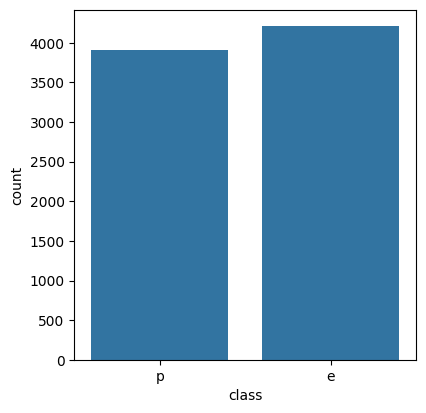

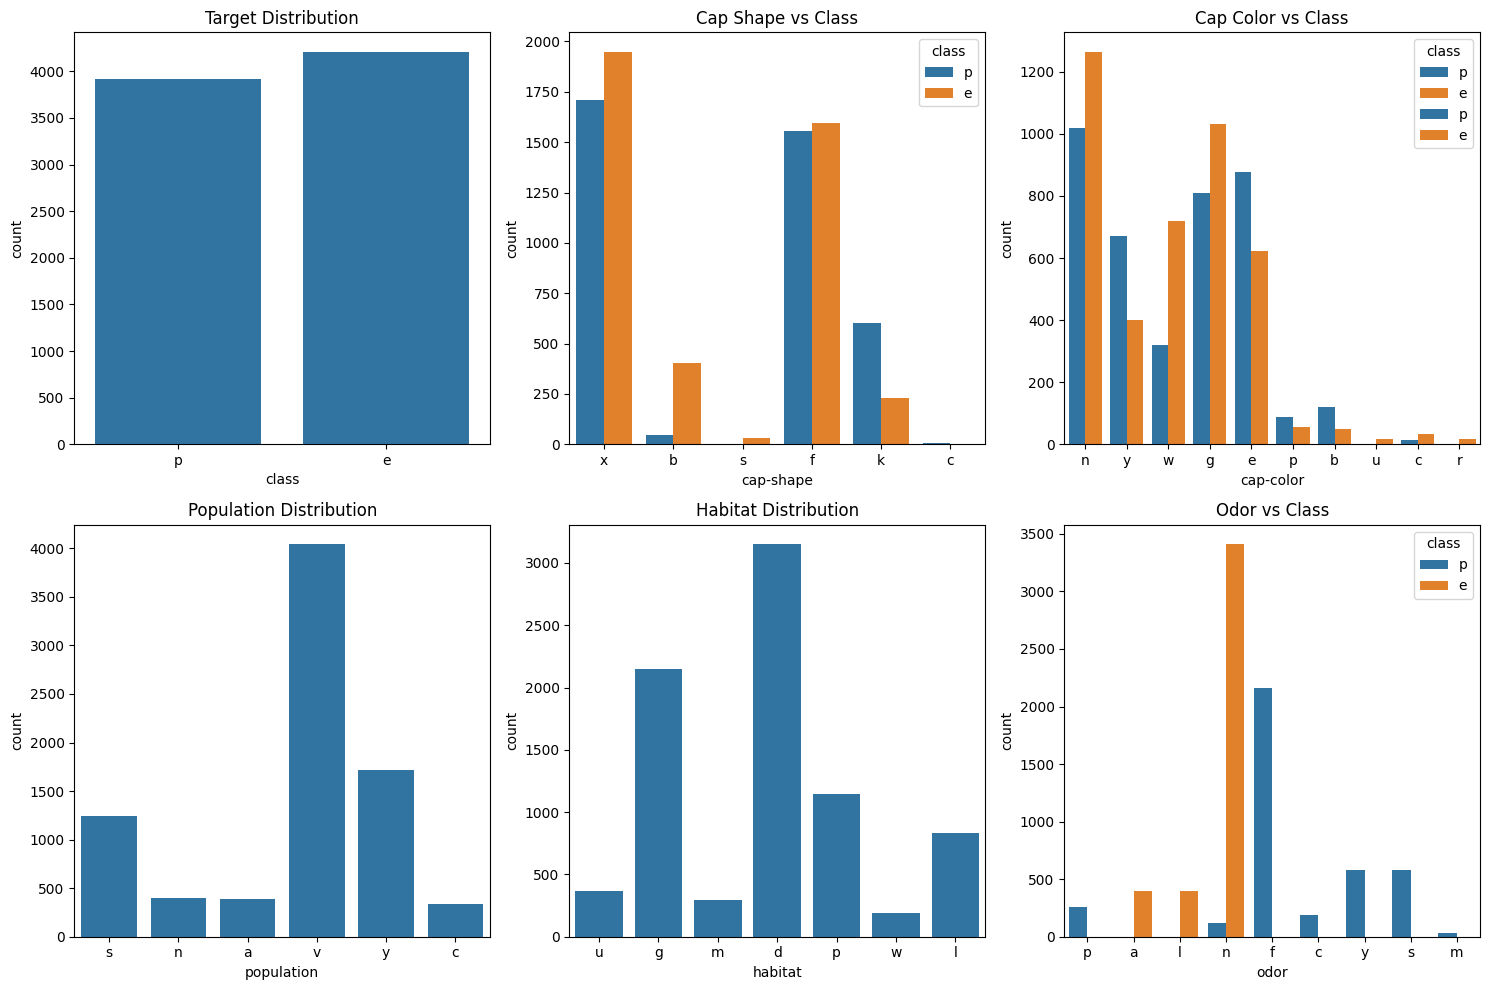

kMeans Accuracy: 0.7090


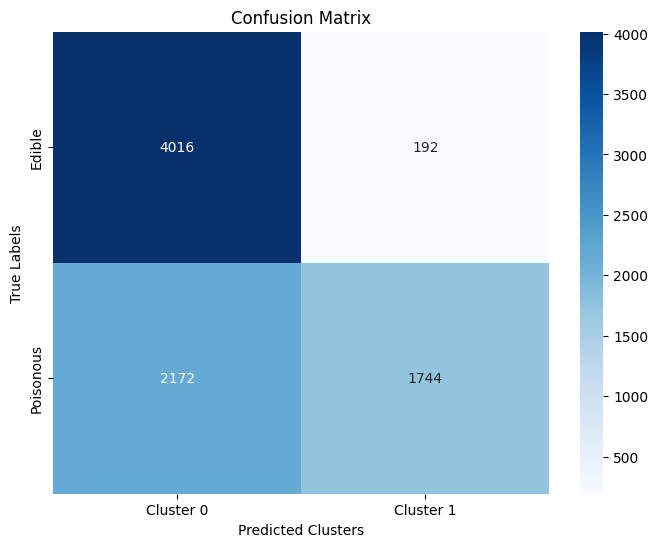


 Classification report:
              precision    recall  f1-score   support

      Edible       0.65      0.95      0.77      4208
   Poisonous       0.90      0.45      0.60      3916

    accuracy                           0.71      8124
   macro avg       0.77      0.70      0.68      8124
weighted avg       0.77      0.71      0.69      8124

Dataset Preview:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                    

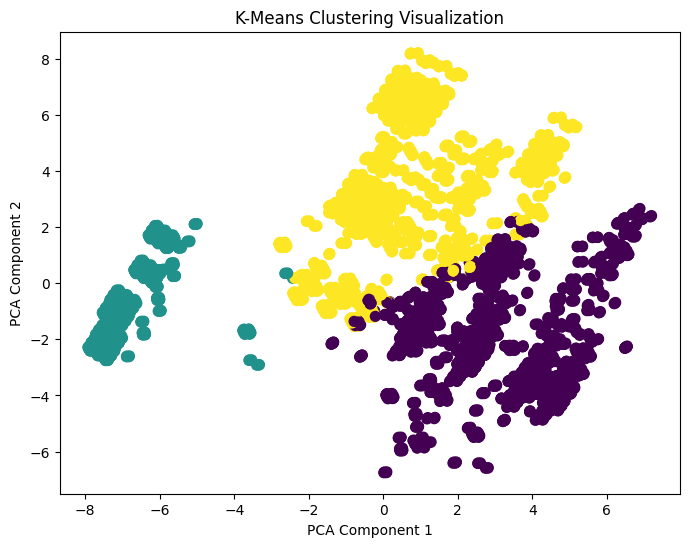

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



m_data = pd.read_csv("./mushrooms.csv")
print("Data Preview")
print(m_data.head())

print("\n Missing values")
print(m_data.isnull().sum())

print(f"Dataset shape: {m_data.shape}")

print(f"Target distribution \n {m_data["class"].value_counts()}")
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)

sns.countplot(data = m_data, x = "class")
print(f"Target distribution \n {m_data['class'].value_counts()}")
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)

sns.countplot(data = m_data, x = "class")
plt.title("Target Distribution")

plt.subplot(2,3,2)
sns.countplot(data= m_data, x="cap-shape", hue="class")
plt.title("Cap Shape vs Class")

plt.subplot(2,3,3)
sns.countplot(data = m_data, x="cap-color", hue="class")
plt.title("Cap Color vs Class")
plt.subplot(2,3,3)
sns.countplot(data = m_data, x = "cap-color", hue = "class")
plt.title("Cap Color vs Class")

plt.subplot(2,3,4)
sns.countplot(data = m_data, x = "population")
plt.title("Population Distribution")

plt.subplot(2,3,5)
sns.countplot(data = m_data, x = "habitat")
plt.title("Habitat Distribution")

plt.subplot(2,3,6)
sns.countplot(data = m_data, x = "odor", hue = "class")
plt.title("Odor vs Class")

plt.tight_layout()
plt.show()

m_df = m_data.dropna()

m_features = m_df.drop("class", axis = 1)
m_labels = m_df["class"]

encoder = OrdinalEncoder()
m_prepared = encoder.fit_transform(m_features)
m_prep_df = pd.DataFrame(m_prepared, columns= m_features.columns)

k_clust = KMeans(n_clusters = 2, random_state=42)
k_clust.fit(m_prep_df)
k_labels = k_clust.labels_

map_dict = { "e": 0 , "p" : 1}
true_labels = m_labels.map(map_dict)

accuracy = accuracy_score(true_labels, k_labels)
print(f"kMeans Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8,6))
cm = confusion_matrix( true_labels, k_labels)
sns.heatmap(cm, annot= True, fmt = "d", cmap= "Blues", xticklabels= ["Cluster 0", "Cluster 1"], yticklabels= ["Edible", "Poisonous"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.show()

print("\n Classification report:")
print(classification_report(true_labels, k_labels, target_names=["Edible", "Poisonous"]))

print("Dataset Preview:")
print(m_data.head())

print("\nMissing Values in Each Column:")
print(m_data.isnull().sum())

label_encoders = {}
for column in m_data.columns:
 if m_data[column].dtype == 'object':
    le = LabelEncoder()
    m_data[column] = le.fit_transform(m_data[column])
    label_encoders[column] = le
    
kmeans = KMeans(n_clusters = 3, random_state= 42)
m_data["Cluster"] = kmeans.fit_predict(m_data)

print("\n Cluster Centers: \n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", m_data['Cluster'].value_counts())

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(m_data.drop('Cluster', axis=1))
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=m_data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


